In [10]:
import cufflinks as cf
import plotly.offline as plyo
import datetime as datetime
import yfinance as yf
import pandas as pd
from numpy import linalg as la
import numpy as np
import matplotlib.pyplot as plt

plyo.init_notebook_mode(connected=True)

In [27]:
listAcoes = ['ITUB4', 'KLBN11', 'TRPL4', 'PETR4', 'VALE3']
listAcoes = [acoes + '.SA' for acoes in listAcoes]
print(listAcoes)

data_f = datetime.datetime.now()
data_i = data_f - datetime.timedelta(days=3000)


precos = yf.download(listAcoes, start=data_i, end=data_f)['Adj Close']
print(precos)
df = pd.DataFrame(precos)
plyo.iplot(df.iplot(asFigure=True), image='png', filename='ply01')

['ITUB4.SA', 'KLBN11.SA', 'TRPL4.SA', 'PETR4.SA', 'VALE3.SA']
[*********************100%%**********************]  5 of 5 completed
             ITUB4.SA  KLBN11.SA   PETR4.SA   TRPL4.SA   VALE3.SA
Date                                                             
2015-09-28  10.984978  15.521537   2.198965   4.912508  10.148869
2015-09-29  10.938555  15.710469   2.250183   4.923726  10.081577
2015-09-30  11.187539  15.899405   2.472129   5.085773  10.142753
2015-10-01  11.350105  16.328136   2.397008   5.024693  10.534268
2015-10-02  11.810364  16.553400   2.653099   5.153084  10.901316
...               ...        ...        ...        ...        ...
2023-12-11  31.799999  20.940001  34.360001  24.119200  72.860001
2023-12-12  31.639999  20.850000  34.080002  23.697824  72.989998
2023-12-13  32.599998  21.520000  34.570000  24.045918  73.000000
2023-12-14  32.869999  21.850000  35.320000  23.760000  73.400002
2023-12-15  32.799999  21.910000  35.320000  23.770000  73.800003

[2045 rows

In [28]:
listAcoes = ['VALE3']
listAcoes = [acoes + '.SA' for acoes in listAcoes]

data_f = datetime.datetime.now()
data_i = data_f - datetime.timedelta(days=3000)


precos = yf.download(listAcoes, start=data_i, end=data_f)
dfGrafico = pd.DataFrame(precos)
dfGrafico = dfGrafico[['Open', 'High', 'Low', 'Close']]
dfGrafico = dfGrafico.iloc[-60:]

qf = cf.QuantFig(dfGrafico, title='Gráfico de VALE3', legend='top', name='VALE3')
plyo.iplot(qf.iplot(asFigure=True), image='png', filename='qf_01')



[*********************100%%**********************]  1 of 1 completed


In [29]:
qf.add_bollinger_bands(periods=15, boll_std=2)
plyo.iplot(qf.iplot(asFigure=True), image='png', filename='qf_02')

In [30]:
qf.add_rsi(periods=14, showbands=False)
plyo.iplot(qf.iplot(asFigure=True), image='png', filename='qf_03')

In [32]:
listAcoes = ['ITUB4', 'KLBN11', 'TRPL4', 'PETR4', 'VALE3']
listAcoes = [acoes + '.SA' for acoes in listAcoes]
print(listAcoes)

data_f = datetime.datetime.now()
data_i = data_f - datetime.timedelta(days=3000)


precos = yf.download(listAcoes, start=data_i, end=data_f)['Adj Close']
print(precos)
df = pd.DataFrame(precos)

['ITUB4.SA', 'KLBN11.SA', 'TRPL4.SA', 'PETR4.SA', 'VALE3.SA']
[*********************100%%**********************]  5 of 5 completed
             ITUB4.SA  KLBN11.SA   PETR4.SA   TRPL4.SA   VALE3.SA
Date                                                             
2015-09-28  10.984974  15.521540   2.198965   4.912508  10.148870
2015-09-29  10.938557  15.710469   2.250183   4.923726  10.081575
2015-09-30  11.187540  15.899403   2.472128   5.085773  10.142751
2015-10-01  11.350109  16.328135   2.397009   5.024694  10.534268
2015-10-02  11.810365  16.553402   2.653099   5.153083  10.901314
...               ...        ...        ...        ...        ...
2023-12-11  31.799999  20.940001  34.360001  24.119200  72.860001
2023-12-12  31.639999  20.850000  34.080002  23.697824  72.989998
2023-12-13  32.599998  21.520000  34.570000  24.045918  73.000000
2023-12-14  32.869999  21.850000  35.320000  23.760000  73.400002
2023-12-15  32.759998  21.910000  35.310001  23.780001  73.760002

[2045 rows

Volatilidade
Alocação total de: R$ ITUB4.SA     2056.201634
KLBN11.SA    2168.091779
PETR4.SA     1372.351538
TRPL4.SA     2898.281242
VALE3.SA     1505.073807
dtype: float64


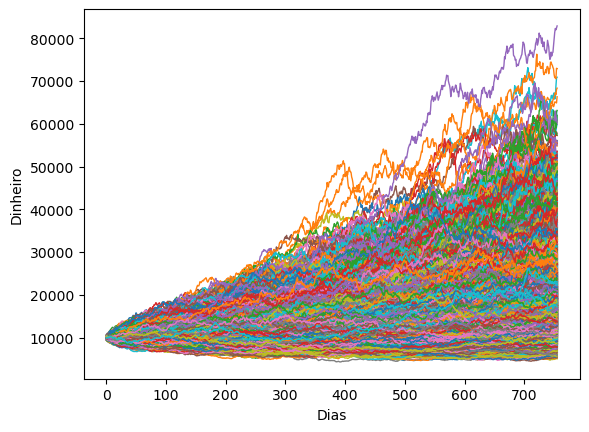

[29352.94891815 25336.75654599 19532.16710831 ... 10346.91535072
  8749.28204951 23067.0441537 ]
'
      Ao investir R$ 10000, podemos esperar esses resultados para
      os próximos 3 anos, utilizando o método de Monte Carlo com 10 mil simulações:

      Com 50% de probabilidade, o montante será maior que R$ 18909.009414927303.
      Com 95% de probabilidade, o montante será maior que R$ 10016.269593695706.
      Com 99% de probabilidade, o montante será maior que R$ 7847.799437417677.

      95.08% dos cenários, foi possível obter lucro nos próximos 3 anos.
      
      


In [33]:
retornos = precos.pct_change().dropna()

# Distribuição da carteira ajustada pela volatilidade de cada ativo
vol = retornos.std()
weights = 1 / vol
weights /= weights.sum()
print("Volatilidade")

# Visualização do valor financeiro de cada ativo
alocacao = weights * 10000
print(f'Alocação total de: R$ {alocacao}')

media_r = retornos.mean()
matriz_covariancia = retornos.cov()
pesos_carteira = np.full(len(listAcoes), weights)
numero_acoes = len(listAcoes)


numero_simulacoes = 10000
dias_projetados = 252 * 3
capital_inicial = 10000


retorno_m = retornos.mean(axis=0).to_numpy()
matriz_r_m = retorno_m * np.ones(shape=(dias_projetados, numero_acoes))

L = la.cholesky(matriz_covariancia)

retornos_carteira = np.zeros([dias_projetados, numero_simulacoes])
montante_final = np.zeros(numero_simulacoes)

for s in range(numero_simulacoes):
    Rdpf = np.random.normal(size=(dias_projetados, numero_acoes))
    retornos_sinteticos = matriz_r_m + np.inner(Rdpf, L)
    retornos_carteira[:, s] = np.cumprod(np.inner(pesos_carteira, retornos_sinteticos) + 1) * capital_inicial
    montante_final[s] = retornos_carteira[-1, s]


plt.plot(retornos_carteira, linewidth=1)
plt.ylabel('Dinheiro')
plt.xlabel('Dias')
plt.savefig('gráfico_cenarios.png', format='png')
plt.show()

print(montante_final)

montante_99 = str(np.percentile(montante_final, 1))
montante_95 = str(np.percentile(montante_final, 5))
montante_mediano = str(np.percentile(montante_final, 50))
cenarios_com_lucro = str((len(montante_final[montante_final > capital_inicial]) / len(montante_final)) * 100) + "%"

print(f''''
      Ao investir R$ {capital_inicial}, podemos esperar esses resultados para
      os próximos 3 anos, utilizando o método de Monte Carlo com 10 mil simulações:

      Com 50% de probabilidade, o montante será maior que R$ {montante_mediano}.
      Com 95% de probabilidade, o montante será maior que R$ {montante_95}.
      Com 99% de probabilidade, o montante será maior que R$ {montante_99}.

      {cenarios_com_lucro} dos cenários, foi possível obter lucro nos próximos 3 anos.
      
      ''')
